# ISOM 352 Applied Data Analytics with Coding


The purpose of this lab is to practice implementing linear regression models using statsmodels in Python. 

The dataset represents real estate data from Eastville, CT, and the goal is to perform predictive analytics to estimate house prices based on two key variables: square footage and school district.



In [164]:
# Install and import the library 
# %pip install pandas matplotlib seaborn statsmodels -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

import statsmodels.api as sm

## Pre-processing the data

In [92]:
# import the csv into pandas
df = pd.read_csv("eastville.csv")
# Convert categorical variables into dummy variables
df_dummy = pd.get_dummies(df, dtype='int8', columns=['school']) 
# Display dataset
df_dummy.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   house                108 non-null    int64 
 1   sqft                 108 non-null    int64 
 2   beds                 108 non-null    int64 
 3   baths                108 non-null    int64 
 4   heat                 108 non-null    int64 
 5   style                108 non-null    object
 6   garage               108 non-null    int64 
 7   basement             108 non-null    int64 
 8   age                  108 non-null    int64 
 9   fire                 108 non-null    int64 
 10  price                108 non-null    int64 
 11  school_Apple Valley  108 non-null    int8  
 12  school_Plum Ridge    108 non-null    int8  
dtypes: int64(10), int8(2), object(1)
memory usage: 9.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 colum

## Model 1: Square Footage vs. Price
This model examines how house price is affected by square footage

$y=mx+b$
- $X$: the independent variable, the predictor, the feature
- $y$: the dependent variable, the target, the response

### Simple Regression For Square Footage Model

In [59]:
# Specify the predictor and the target
x = df['sqft']
y = df['price']

# Add a constant to the model (statsmodels doesn't do this by default)
X= sm.add_constant(x)

# Create a model and fit the data
model_sqft = sm.OLS(y,X).fit()

# Display the summary results
print(model_sqft.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     156.5
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.35e-22
Time:                        01:32:48   Log-Likelihood:                -1325.9
No. Observations:                 108   AIC:                             2656.
Df Residuals:                     106   BIC:                             2661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.649e+04   2.33e+04      2.421      0.0

### Significance And Slope For Square Footage Model
- significance: pvalue `model.pvalues`
- impact: slope rise over run on average `model.params`

In [85]:
# Check p-value and slope for school district model


pvalue_sqft = model_sqft.pvalues['sqft'].round(3)
print(f"The p-value for sqft is {pvalue_sqft:.3f}")

# check the impact of total_bill
b_sqft = model_sqft.params['sqft'].round(3)
print(f"The slope of sqft is {b_sqft:.3f}")

The p-value for sqft is 0.000
The slope of sqft is 142.848


Since the p-value is less than 0.05, the relationship between square footage and price is statistically significant.

The slope represents for each additional 1 square foot of house area, the predicted price increases by $142.85, assuming all other factors remain constant.

### Prediction and Evaluate Quality For Square Footage Model

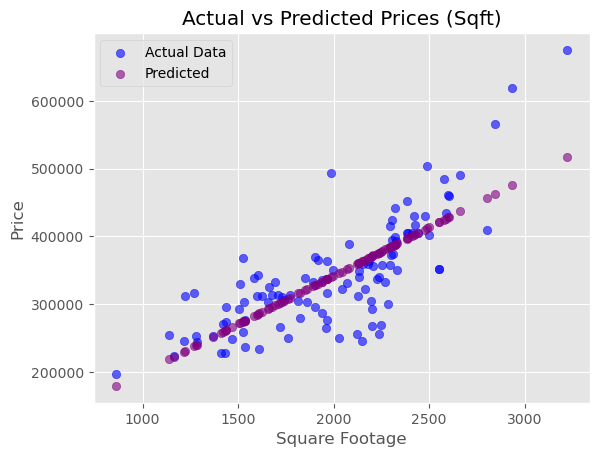

In [86]:
# Make predictions with the model by plugging in the X values
y_pred_sqft = model_sqft.predict(X)
y_pred_sqft
# Visualize the actual vs Prediction with the scatter plot
# Create a scatter plot of actual vs predicted values
plt.scatter(x, y, color='blue', alpha=0.6, label='Actual Data')
plt.scatter(x, y_pred_sqft, color='purple', alpha=0.6, label='Predicted')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices (Sqft)')
plt.legend()
plt.show()


The R-squared value is 59.60%


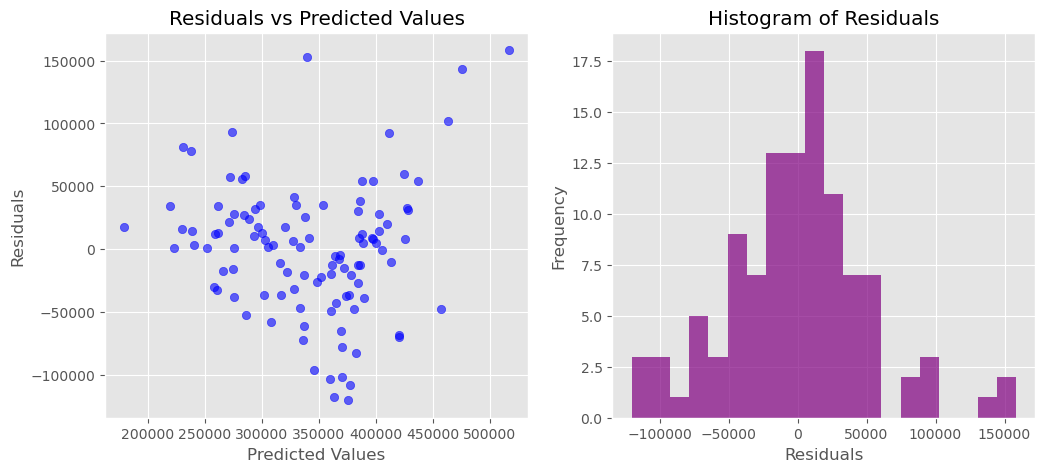

In [87]:
# Visualize with the residual plot
# Calculate residuals (actual - predicted) or directly use model.resid
residuals = y - y_pred_sqft

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Residuals vs Predicted values
ax1.scatter(y_pred_sqft, residuals, color='blue', alpha=0.6)
# add labels and title
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Values')

# Plot 2: Histogram of residuals
ax2.hist(residuals, bins=20, color='purple', alpha=0.7)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Residuals')

# kind of normal distribution 
r2 = model_sqft.rsquared.round(3)
print(f"The R-squared value is {r2:.2%}")


The model produced an R² value of 59.60%. This means that 59.60% of the variation in house prices can be explained by square footage.

The Actual Vs Predicted Values scatter plot shows that the predicted prices follow the actual prices, but there may be some overestimation or underestimation.

The Residuals vs Predicted Values plot shows random scatter, suggesting the model does not have major bias. The histogram is also a kind of normal distribution 

## Model 2: School District vs. Price
This model examines how house prices vary across different school districts

### Simple Regression For School District Model

In [166]:

# Specify the predictor and the target
x_school = df_dummy['school_Plum Ridge']
y = df['price']


# Add a constant to the model (statsmodels doesn't do this by default)
X_school = sm.add_constant(x_school)

# Create a model and fit the data
model_school = sm.OLS(y, X_school).fit()

# Display the summary results
print(model_school.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     19.99
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.96e-05
Time:                        03:05:32   Log-Likelihood:                -1365.5
No. Observations:                 108   AIC:                             2735.
Df Residuals:                     106   BIC:                             2740.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.679e+05   9383.55

### Significance And Slope For School District Model
- significance: pvalue `model.pvalues`
- impact: slope rise over run on average `model.params`

In [167]:
# Check p-value and slope for school district model

pvalue_school = model_school.pvalues['school_Plum Ridge'].round(3)
print(f"The p-value for school_Plum Ridge is {pvalue_school:.3f}")

# check the impact of total_bill
b_school = model_school.params['school_Plum Ridge'].round(3)
print(f"The slope of school_Plum Ridge is {b_school:.3f}")



The p-value for school_Plum Ridge is 0.000
The slope of school_Plum Ridge is -66494.347


Since the p-value is less than 0.05, the school district (Plum Ridge vs. the baseline school) has a significant effect on house price.

The slope represents the change in price when moving from the baseline school district to Plum Ridge.
The slope is negative (-66494.347) so it means that on average houses in Plum Ridge are $66,494.35 cheaper than houses in the baseline school district.

### Prediction and Evaluate Quality For School District Model

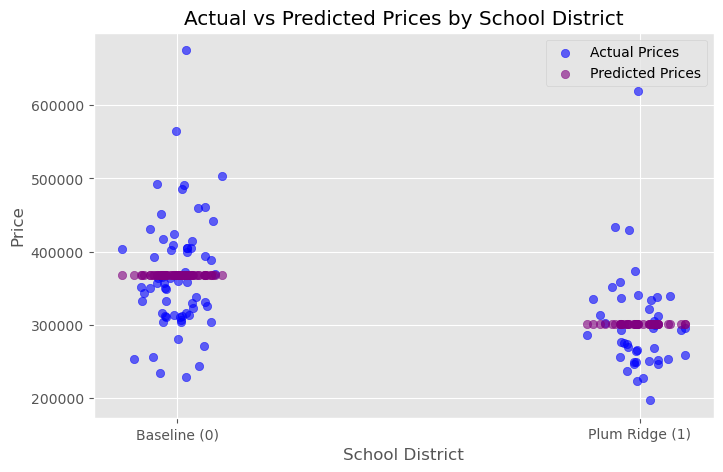

In [168]:
y_pred_school = model_school.predict(X_school)

x_jittered = df_dummy['school_Plum Ridge'] + np.random.normal(0, 0.05, size=len(df_dummy))

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_jittered, y, color='blue', alpha=0.6, label='Actual Prices')
plt.scatter(x_jittered, y_pred_school, color='purple', alpha=0.6, label='Predicted Prices')

# Labels and title
plt.xticks([0, 1], ['Baseline (0)', 'Plum Ridge (1)'])  # Set x-axis labels
plt.xlabel('School District')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices by School District')
plt.legend()

# Show the plot
plt.show()


The R-squared value for School model is 15.90%


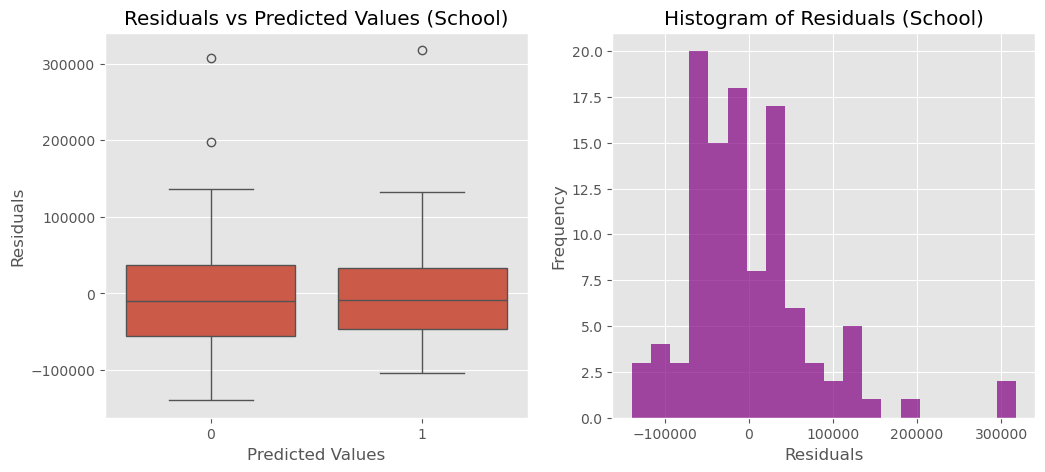

In [169]:
# Visualize with the residual plot
# Calculate residuals (actual - predicted) or directly use model.resid
residuals_school = y - y_pred_school


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Residuals vs Predicted values
sns.boxplot(x=df_dummy['school_Plum Ridge'], y=residuals_school, ax=ax1)
# add labels and title
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Values (School)')

# Plot 2: Histogram of residuals

ax2.hist(residuals_school, bins=20, color='purple', alpha=0.7)
ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Residuals (School)')

# kind of normal distribution with some high residuals
r2_school = model_school.rsquared.round(3)
print(f"The R-squared value for School model is {r2_school:.2%}")


The model produced an R² value of 15.90%. This means that 15.90% of the variation in house prices can be explained by square footage.

The Actual Vs Predicted Values scatter plot shows the predicted price is very cluster while the actual prices have a wider spreads. The prices vary much more than the prediction

The Residuals vs Predicted Values plot shows there is a large spread in residual and some houses are being predicted way too high or too low. It is not very consistent. The histogram shows that it is right-skewed, suggesting that the model sometimes underestimates house prices